Text(0.5, 0, 'Initial Conditions for θᵢ')

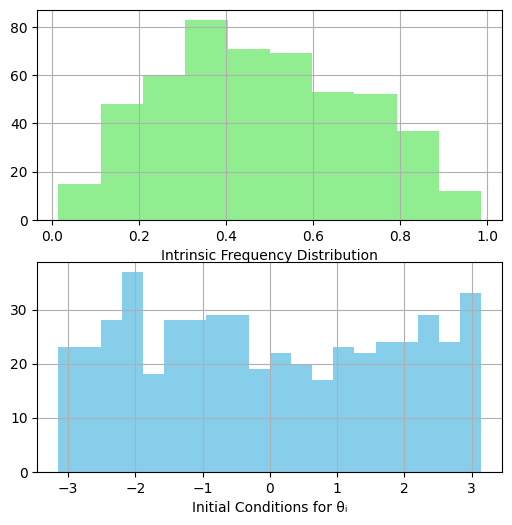

In [23]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import beta
from scipy.integrate import odeint
import networkx as nx 
import time 

start_time = time.time()

# Set up plotting parameters
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['font.size'] = 10

DOT_SIZE = 250

# Parameters
N = 500     # number of oscillators

# Create beta distribution
a1, b1 = 2, 2
W = beta.rvs(a1, b1, size=N)    # intrinsic frequencies

a2, b2 = 1, 1
P0 = 2 * np.pi * beta.rvs(a2, b2, size=N) - np.pi   # initial phases

K = 50      # coupling constant
Kn = K/N    # coupling strength
tmax = 50
t = np.linspace(0, tmax, 1000)

# Plot PDFs
plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
plt.hist(W, color='lightgreen')
plt.grid(True)
plt.xlabel('Intrinsic Frequency Distribution')

plt.subplot(2, 1, 2)
plt.hist(P0, bins=np.linspace(-np.pi, np.pi, 21), color='skyblue')
plt.grid(True)
plt.xlabel('Initial Conditions for θᵢ')

```# Phase frustration matrix
p_alpha = 0
alpha_0 = 0
alpha = alpha_0 * np.pi
alpha_matrix = np.random.rand(N, N)
alpha_matrix = np.triu(alpha_matrix) + np.triu(alpha_matrix, 1).T
np.fill_diagonal(alpha_matrix, 0)
alpha_matrix = (alpha_matrix < p_alpha) * alpha

# Create random modular graph
def random_modular_graph(N, C, p_edge, l):
    # This is a simplified version - you might want to implement a more sophisticated
    # random modular graph generator
    G = nx.random_partition_graph([N//C] * C, p_edge * l, p_edge * (1-l))
    return nx.to_numpy_array(G)

C = 10  # number of clusters
p_edge = 0.05  # probability of attachment
l = 0.75  # proportion of links within modules
A = random_modular_graph(N, C, p_edge, l)
A_K = A * K

# Define the system of differential equations
def dPdt(P, t, W, A_K, alpha_matrix):
    P_mesh = np.meshgrid(P, P)[0]
    return W + (1/N) * np.sum(A_K * np.sin(P_mesh - P_mesh.T - alpha_matrix), axis=1)

# Solve the system
P = odeint(dPdt, P0, t, args=(W, A_K, alpha_matrix))

# Visualization
plt.figure(figsize=(12, 12))
for idx in range(len(t)):
    plt.clf()
    
    # Plot 1: Oscillators on unit circle
    plt.subplot(2, 2, 1)
    plt.scatter(np.cos(P[idx]), np.sin(P[idx]), c=range(N), s=DOT_SIZE, cmap='hsv')
    plt.grid(True)
    plt.xlabel('cos(θᵢ)')
    plt.ylabel('sin(θᵢ)')
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

    # Plot 2: Phase evolution
    plt.subplot(2, 2, 2)
    plt.scatter([t[idx]]*N, P[idx], c=range(N), s=DOT_SIZE, cmap='hsv')
    plt.xlabel('time(t)')
    plt.ylabel('θᵢ(t)')

    # Plot 3: Order parameter
    plt.subplot(2, 2, 3)
    circle = plt.Circle((0, 0), 1, fill=False, color='orange')
    plt.gca().add_artist(circle)
    q = np.exp(1j * P[idx])
    q_sum = np.sum(q)/N
    plt.plot(q_sum.real, q_sum.imag, 'o', color=[0, 0.447, 0.741])
    plt.grid(True)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Re(e^{iθⱼ})')
    plt.ylabel('Im(∑e^{iθⱼ}/N)')

    # Plot 4: Order parameter magnitude
    plt.subplot(2, 2, 4)
    r_sum = np.abs(np.sum(np.exp(1j * P[:idx+1]), axis=1)/N)
    plt.plot(t[:idx+1], r_sum, color=[0, 0.447, 0.741])
    plt.grid(True)
    plt.xlabel('time (t)')
    plt.ylabel('R = |∑e^{iθⱼ(t)}/N|')
    plt.ylim(0, 1.5)

    plt.pause(0.1)

print(f"Execution time: {time.time() - start_time} seconds")```